# Desafio 05



## IMPORTS DE BILIOTECAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Etapa 1: Carregando os dados

In [ ]:
listings_df = pd.read_csv("listings_cleaned.csv")
reviews_df = pd.read_csv("reviews.csv")

# Mesclando os dados
merged_df = pd.merge(listings_df, reviews_df, on='id', how='inner')

## Etapa 2: Limpeza de Dados

In [ ]:
# Verificando valores nulos
display(merged_df.isnull().sum())

#Como todos os dados no merge vieram completos, vamos apenas confirmar tipos
display(merged_df.info())

#Removendo registros com valores inconsistentes (ex: preço = 0, bathrooms = 0, beds = 0)
merged_df = merged_df[(merged_df['price'] > 0) & (merged_df['bathrooms'] > 0) & (merged_df['beds'] > 0)]

id                        0
neighbourhood_cleansed    0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
number_of_reviews         0
review_scores_rating      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32695 non-null  int64  
 1   neighbourhood_cleansed  32695 non-null  object 
 2   room_type               32695 non-null  object 
 3   accommodates            32695 non-null  int64  
 4   bathrooms               32695 non-null  float64
 5   bedrooms                32695 non-null  float64
 6   beds                    32695 non-null  float64
 7   price                   32695 non-null  float64
 8   number_of_reviews       32695 non-null  int64  
 9   review_scores_rating    32695 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 2.5+ MB


None

## Etapa 3: Tratando Outliers

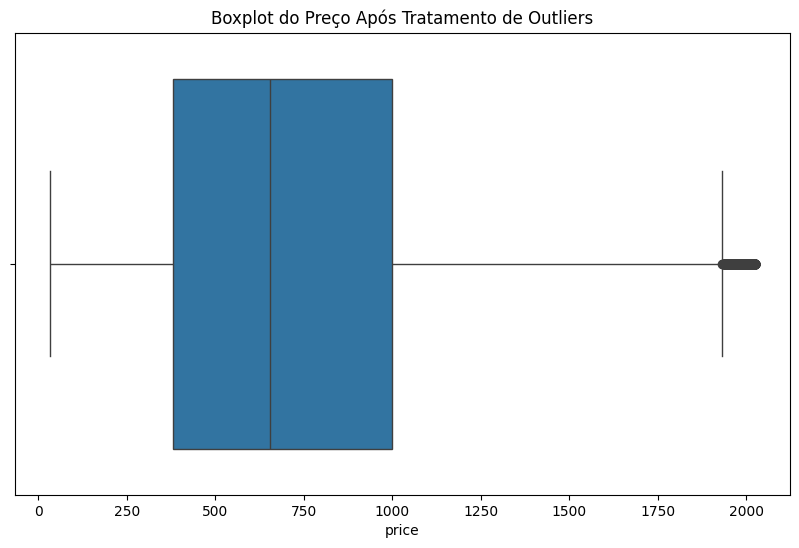

In [ ]:
# Identificando outliers em 'price' usando o método IQR
Q1 = merged_df['price'].quantile(0.25)
Q3 = merged_df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Removendo os outliers de preço
merged_df = merged_df[(merged_df['price'] >= limite_inferior) & (merged_df['price'] <= limite_superior)]

# Plotando boxplot do preço após remoção de outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=merged_df['price'])
plt.title('Boxplot do Preço Após Tratamento de Outliers')
plt.show()

# Etapa 4: Transformação de Dados Categóricos

In [ ]:
# Transformando 'room_type' em variáveis numéricas
merged_df['room_type'] = merged_df['room_type'].astype('category').cat.codes

# Etapa 5: Conferência Final

In [ ]:
# Verificando o resultado
print(merged_df.info())
display(merged_df.describe())
display(merged_df.head())

# Salvando o dataset final tratado
merged_df.to_csv("airbnb_rio_tratado.csv", index=False)



<class 'pandas.core.frame.DataFrame'>
Index: 31041 entries, 0 to 32694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      31041 non-null  int64  
 1   neighbourhood_cleansed  31041 non-null  object 
 2   room_type               31041 non-null  int8   
 3   accommodates            31041 non-null  int64  
 4   bathrooms               31041 non-null  float64
 5   bedrooms                31041 non-null  float64
 6   beds                    31041 non-null  float64
 7   price                   31041 non-null  float64
 8   number_of_reviews       31041 non-null  int64  
 9   review_scores_rating    31041 non-null  float64
dtypes: float64(5), int64(3), int8(1), object(1)
memory usage: 2.4+ MB
None


,id,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
count,3.104100e+04,31041.000000,31041.000000,31041.000000,31041.000000,31041.000000,31041.000000,31041.000000,31041.000000
mean,6.893775e+17,0.422699,3.700976,1.380610,1.397796,2.196547,745.231822,24.375117,4.816681
std,5.200914e+17,0.828977,1.896453,0.705488,0.842034,1.619130,461.250917,46.695601,0.294415
min,1.787800e+04,0.000000,1.000000,0.500000,0.000000,1.000000,33.000000,0.000000,0.000000
25%,4.233433e+07,0.000000,2.000000,1.000000,1.000000,1.000000,380.000000,1.000000,4.812309
50%,8.478254e+17,0.000000,4.000000,1.000000,1.000000,2.000000,654.000000,6.000000,4.830000
75%,1.150779e+18,0.000000,4.000000,2.000000,2.000000,3.000000,1000.000000,27.000000,5.000000
max,1.320520e+18,3.000000,16.000000,20.000000,26.000000,50.000000,2023.000000,710.000000,5.000000


,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,0,4,1.0,1.0,1.0,723.0,367,4.92
1,272631,Copacabana,2,2,1.0,1.0,2.0,1146.0,32,5.00
3,273363,Santa Teresa,2,1,1.0,1.0,1.0,61.0,5,5.00
4,273463,Lagoa,0,6,2.0,2.0,6.0,1411.0,654,4.83
5,273496,Leblon,0,6,2.5,2.0,5.0,703.0,60,4.80
